In [202]:
import pandas as pd
import numpy as np
import scipy.io
import seaborn as sns
import matplotlib.pyplot as plt
from pymongo import MongoClient
import plotly
import plotly.express as px

In [193]:
data = np.load("../Data/C1-371_new/C1-371_processed.npy")

In [206]:
df = pd.DataFrame(data=data.T, columns=["x_pos","y_pos","z_pos","lat","lon"])


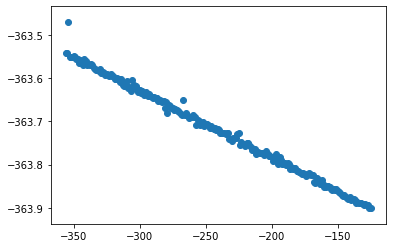

In [199]:
data.T.shape
x, y = data[0,:], data[1,:]
plt.scatter(x, y)

In [205]:
df = pd.DataFrame(data=data.T, columns=["x_pos","y_pos","z_pos","lat","lon"])

fig = px.scatter(df, x="x_pos", y='y_pos', 
                 size="z_pos",
                 width=600, height=400)
fig.show()
plotly.offline.plot(fig, filename='scatter.html')


'scatter.html'

In [190]:
df

[{'x_pos': -125.07847585787923,
  'y_pos': -363.89974973728636,
  'z_pos': 40.61589431689576,
  'lat': 12.517766619376038,
  'lon': 55.782755406004874},
 {'x_pos': -126.07872008770977,
  'y_pos': -363.90042113977967,
  'z_pos': 40.614551545123874,
  'lat': 12.517751391940502,
  'lon': 55.782758065388705},
 {'x_pos': -127.0776671856544,
  'y_pos': -363.89385986501156,
  'z_pos': 40.62314987093749,
  'lat': 12.51773621844347,
  'lon': 55.78276078335092},
 {'x_pos': -128.0794678737186,
  'y_pos': -363.89282227341005,
  'z_pos': 40.6289482146915,
  'lat': 12.517720975393946,
  'lon': 55.78276346153667},
 {'x_pos': -129.07778928745685,
  'y_pos': -363.8923950129303,
  'z_pos': 40.634284973015845,
  'lat': 12.51770578241296,
  'lon': 55.782766125215105},
 {'x_pos': -130.07893378233257,
  'y_pos': -363.89352418767703,
  'z_pos': 40.646026610394195,
  'lat': 12.517690539101839,
  'lon': 55.78276878306382},
 {'x_pos': -131.07762155392948,
  'y_pos': -363.8919372406769,
  'z_pos': 40.64347839586

In [151]:
df = df[0:229]

[{'x_pos': -125.07847585787923,
  'y_pos': -363.89974973728636,
  'z_pos': 40.61589431689576,
  'lat': 12.517766619376038,
  'lon': 55.782755406004874},
 {'x_pos': -126.07872008770977,
  'y_pos': -363.90042113977967,
  'z_pos': 40.614551545123874,
  'lat': 12.517751391940502,
  'lon': 55.782758065388705},
 {'x_pos': -127.0776671856544,
  'y_pos': -363.89385986501156,
  'z_pos': 40.62314987093749,
  'lat': 12.51773621844347,
  'lon': 55.78276078335092},
 {'x_pos': -128.0794678737186,
  'y_pos': -363.89282227341005,
  'z_pos': 40.6289482146915,
  'lat': 12.517720975393946,
  'lon': 55.78276346153667},
 {'x_pos': -129.07778928745685,
  'y_pos': -363.8923950129303,
  'z_pos': 40.634284973015845,
  'lat': 12.51770578241296,
  'lon': 55.782766125215105},
 {'x_pos': -130.07893378233257,
  'y_pos': -363.89352418767703,
  'z_pos': 40.646026610394195,
  'lat': 12.517690539101839,
  'lon': 55.78276878306382},
 {'x_pos': -131.07762155392948,
  'y_pos': -363.8919372406769,
  'z_pos': 40.64347839586

In [152]:
client = MongoClient()
db =  client['ChannelCharting']

229

In [135]:
features = ['Scaling', 'SamplingRate', 'x']

In [165]:
df[0]

{'x_pos': -125.07847585787923,
 'y_pos': -363.89974973728636,
 'z_pos': 40.61589431689576,
 'lat': 12.517766619376038,
 'lon': 55.782755406004874,
 'real': [0.0,
  1.7668102099493117e-05,
  -3.533620419898623e-06,
  -1.7668102099493117e-05,
  -2.1201722519391737e-05,
  -3.180258377908761e-05,
  -2.1201722519391737e-05,
  -3.5336204198986233e-05,
  7.067240839797246e-06,
  2.1201722519391737e-05,
  1.0600861259695869e-05,
  9.540775133726282e-05,
  -3.533620419898623e-06,
  7.067240839797246e-06,
  1.4134481679594493e-05,
  -1.4134481679594493e-05,
  -4.947068587858072e-05,
  3.533620419898623e-06,
  -1.0600861259695869e-05,
  -3.5336204198986233e-05,
  -4.59370654586821e-05,
  7.067240839797246e-06,
  1.4134481679594493e-05,
  -3.533620419898623e-06,
  4.2403445038783475e-05,
  -1.7668102099493117e-05,
  -3.180258377908761e-05,
  -3.5336204198986233e-05,
  2.1201722519391737e-05,
  4.947068587858072e-05,
  1.4134481679594493e-05,
  -1.4134481679594493e-05,
  3.533620419898623e-06,
  -1

In [181]:
def get_data_from_mat(filename):
    """
    A function to get the data from the mat files in a tuple 
    """
    data_m = scipy.io.loadmat(filename)
    scale, sampling, z = (data_m[feature].flatten() for feature in features)
    real, imag = scipy.signal.resample(np.real(z), len(np.real(z))//111), scipy.signal.resample(np.imag(z), len(np.imag(z))//111)
    return real.tolist(), imag.tolist(), int(scale[0]), float(sampling[0])

In [188]:
from tqdm.notebook import tqdm
for i in tqdm(range(229)):
    try:
        df[i]['real'], df[i]['imag'],  df[i]['scale'],  df[i]['sampling'] = get_data(i)
        db.measurements.insert_one(df[i])
    except Exception:
        continue

In [159]:
client = MongoClient()
db =  client['ChannelCharting']

In [174]:
import scipy.signal

In [178]:
new = scipy.signal.resample(real, len(real)//111)

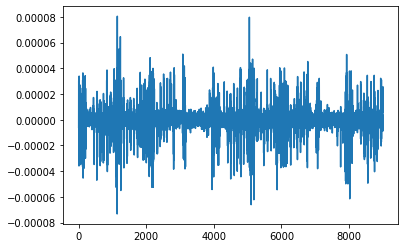

In [179]:
plt.plot(new)